In [27]:
import numpy as np
import sympy as s
import pandas as pd
import matplotlib.pyplot as plt
from reader import llegeix_dades
from exporter import exporta
from ebola_2 import ebola2
from ebola_313 import ebola3
import distancia
from importlib import reload
from distancia import distancia as d

In [28]:
dades = [pd.read_csv("Dades_takes/"+str(i)+"Cart.csv") for i in range(1,5)]
polinomis = [pd.read_csv("Dades_polinomis/take"+str(i)+"_hr.csv") for i in range(1,5)]

In [31]:
c,k,sigma,mu = 0.8894148276526314,0.29164231949164177,1.0326906401025118,0.010368090273491459

# TAKE 1

In [32]:
import time as t
def fitness(v,i):
    return d(ebola2(*v,len(polinomis[i-1]),1/180,x0,y0,vx0,vy0,1), dades[i-1][200:].rename(lambda x: x-200))[2]
d1 = dades[0]
x0 = dades[0]["x"][175]
y0 = dades[0]["y"][175]
vx0 = dades[0]["vx"][175]
vy0 = dades[0]["vy"][175]


0.0329854391406


(-0.40000000000000002,
 0.40000000000000002,
 -0.40000000000000002,
 0.40000000000000002)

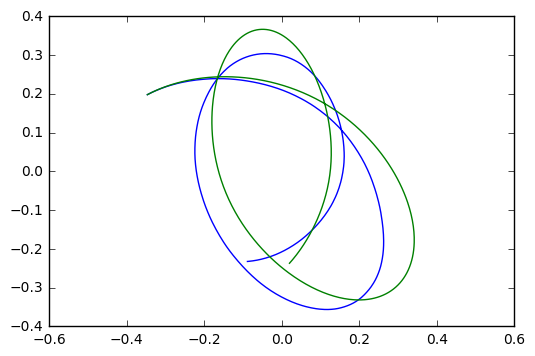

In [33]:
%matplotlib inline
timestep = 1/180
steps = len(polinomis[0])
r = ebola2(c, k, sigma, mu, steps, timestep,x0,y0,vx0,vy0,True)

plt.plot(dades[0]['x'][175:837], dades[0]['y'][175:837])
plt.plot(r['x'], r['y'])
plt.axis("equal")

# TAKE 2

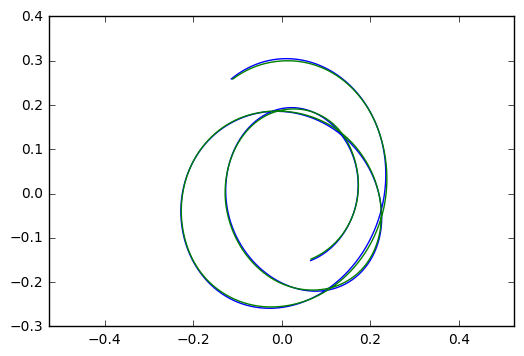

In [89]:
plt.plot(polinomis[1]['x'],polinomis[1]['y'])
plt.axis("equal")
plt.plot(dades[1]['x'][270:1158],dades[1]['y'][270:1158])

In [96]:
d2 = dades[1]
x0 = d2["x"][270]
y0 = d2["y"][270]
vx0 = d2["vx"][270]
vy0 = d2["vy"][270]
timestep = 1/180
steps = len(polinomis[1])
print(fitness([c,k,sigma,mu],2))
r = ebola2(c, k, sigma, mu, steps, timestep,x0,y0,vx0,vy0,True)

0.0865012256


888


(-0.30000000000000004,
 0.30000000000000004,
 -0.30000000000000004,
 0.40000000000000002)

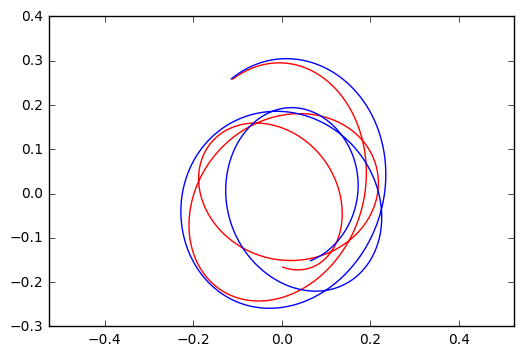

In [107]:
print(len(r['x']))
z = 888
plt.plot(r['x'][:z],r['y'][:z],color = 'red')
plt.plot(polinomis[1]['x'][:z], polinomis[1]['y'][:z])
plt.plot(dades[1]['x'][270:1158],dades[1]['y'][270:1158])
plt.axis("equal")

# Take 3

In [111]:
polinomis[2]['t'][0], polinomis[2]['t'][962]

(0.55555555555555503, 5.8999999999999808)

In [116]:
dades[2]['t'][100:1063]

100    0.555556
101    0.561111
102    0.566667
103    0.572222
104    0.577778
Name: t, dtype: float64

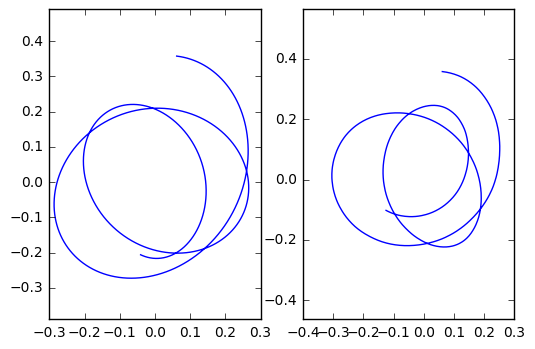

In [135]:
d3 = dades[2]
x0 = d3["x"][100]
y0 = d3["y"][100]
vx0 = d3["vx"][100]
vy0 = d3["vy"][100]
timestep = 1/180
steps = len(polinomis[2])
#r = ebola2(c, k, sigma, mu, steps, timestep,x0,y0,vx0,vy0,True)
plt.subplot(121)
plt.plot(r['x'], r['y'])
plt.axis("equal")
plt.subplot(122)
plt.plot(d3['x'][100:1063], d3['y'][100:1063])
plt.axis("equal")
plt.subplot?

In [139]:
print(fitness([c,k,sigma,mu],4))


0.0218717681549


In [53]:
d3.head()

,t,x,y,vx,vy,ax,ay
0,0.000000,-0.233163,0.129503,0.280097,0.838406,0.940467,-1.357605
1,0.005556,-0.231602,0.134145,0.285428,0.830844,0.982660,-1.353356
2,0.011111,-0.230007,0.138745,0.290981,0.823317,1.021134,-1.349674
3,0.016667,-0.228379,0.143302,0.296737,0.815820,1.056038,-1.346571
4,0.022222,-0.226716,0.147817,0.302677,0.808347,1.087521,-1.344060


## Take 4

In [142]:
polinomis[3]['t'][0], polinomis[3]['t'][328]

(0.55555555555555503, 2.3777777777777702)

In [150]:
dades[3]['t'][100:429].head()

100    0.555556
101    0.561111
102    0.566667
103    0.572222
104    0.577778
Name: t, dtype: float64

In [10]:
d4 = dades[3]
x0 = d4["x"][100]
y0 = d4["y"][100]
vx0 = d4["vx"][100]
vy0 = d4["vy"][100]
timestep = 1/180
steps = len(polinomis[3])
r = ebola2(c, k, sigma, mu, steps, timestep,x0,y0,vx0,vy0,True)
#plt.subplot(121)
plt.plot(r['x'], r['y'])
plt.axis("equal")
#plt.subplot(122)
plt.plot(d4['x'][100:429], d4['y'][100:429])
plt.axis("equal")

(-0.30000000000000004,
 0.40000000000000002,
 -0.30000000000000004,
 0.30000000000000004)

In [104]:
def dq(a,b):
    a1 = a['x'].as_matrix()
    a2 = a['y'].as_matrix()
    b1 = b['x'].as_matrix()
    b2 = b['y'].as_matrix()
    return np.linalg.norm(a1-b1)**2 + np.linalg.norm(a2-b2)**2


In [21]:
distancia_quadrat(ebola2(c, k, sigma, mu, len(polinomis[3]), 1/180,x0,y0,vx0,vy0,True)
,polinomis[3],False)

1.4124995738794266

In [41]:
d(ebola2(c, k, sigma, mu, len(polinomis[3]), 1/180,x0,y0,vx0,vy0,True),polinomis[3])

(1.4124995738794266, 329, 0.0042933117747095033)

In [78]:
%matplotlib inline
ebolaa = ebola2(c, k, sigma, mu, len(polinomis[0]), 1/180,x01,y01,vx01,vy01,"dummy",False)[['x','y']]
ebolab = ebola2(c, k, sigma, mu, len(polinomis[1]), 1/180,x02,y02,vx02,vy02,"dummy",False)[['x','y']]
ebolac = ebola2(c, k, sigma, mu, len(polinomis[2]), 1/180,x03,y03,vx03,vy03,"dummy",False)[['x','y']]
ebolad = ebola2(c, k, sigma, mu, len(polinomis[3]), 1/180,x04,y04,vx04,vy04,"dummy",False)[['x','y']]

In [111]:
d1 = dades[0]
x01 = d1["x"][175]
y01 = d1["y"][175]
vx01 = d1["vx"][175]
vy01 = d1["vy"][175]
d2 = dades[1]
x02 = d2["x"][270]
y02 = d2["y"][270]
vx02 = d2["vx"][270]
vy02 = d2["vy"][270]
d3 = dades[2]
x03 = d3["x"][100]
y03 = d3["y"][100]
vx03 = d3["vx"][100]
vy03 = d3["vy"][100]
d4 = dades[3]
x04 = d4["x"][100]
y04 = d4["y"][100]
vx04 = d4["vx"][100]
vy04 = d4["vy"][100]
d1p = dades[0].iloc[175:838]
d2p = dades[1].iloc[270:1158]
d3p = dades[2].iloc[100:1063]
d4p = dades[3].iloc[100:429]
def nova_fitness(v):
    [c,k,sigma,mu] = v
    ebolaa = ebola2(c, k, sigma, mu, len(polinomis[0]), 1/180,x01,y01,vx01,vy01,"dummy",False)[['x','y']]
    ebolab = ebola2(c, k, sigma, mu, len(polinomis[1]), 1/180,x02,y02,vx02,vy02,"dummy",False)[['x','y']]
    ebolac = ebola2(c, k, sigma, mu, len(polinomis[2]), 1/180,x03,y03,vx03,vy03,"dummy",False)[['x','y']]
    ebolad = ebola2(c, k, sigma, mu, len(polinomis[3]), 1/180,x04,y04,vx04,vy04,"dummy",False)[['x','y']]
    return 0.25*(dq(ebolaa, d1p)+dq(ebolab,d2p)+dq(ebolac,d3p)+dq(ebolad,d4p))

In [28]:
s = pd.read_csv("finals.csv")[["cf", "kf", "sigmaf", "muf"]]

In [108]:
nova_fitness(c,k,sigma,mu)

5.1059837380768256

In [112]:
from scipy.optimize import minimize
c = minimize(nova_fitness,[c,k,sigma,mu], method='Nelder-Mead', options={'disp': True, 'maxiter': 10,'maxfev': 10})

In [113]:
c

 final_simplex: (array([[ 0.88385598,  0.28070573,  1.09077949,  0.01017369],
       [ 0.9116502 ,  0.2770602 ,  1.05850791,  0.01062729],
       [ 0.85606177,  0.28435126,  1.07141654,  0.01075689],
       [ 0.88941483,  0.29164232,  1.08432517,  0.01036809],
       [ 0.88941483,  0.29164232,  1.03269064,  0.01036809]]), array([ 4.39387807,  4.45513387,  4.46361175,  4.92616264,  5.10598374]))
           fun: 4.3938780660017205
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 10
           nit: 4
        status: 1
       success: False
             x: array([ 0.88385598,  0.28070573,  1.09077949,  0.01017369])

In [115]:
k,sigma,mu

(0.29164231949164177, 1.0326906401025118, 0.010368090273491459)

In [ ]:
c,k,sigma,mu